In [2]:
!pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 330.3 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.0 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 445.3 kB/s eta 0:00:00


In [1]:
import pandas as pd
import pymysql
import warnings 
warnings.filterwarnings("ignore")
# Connect to the database
connection = pymysql.connect(
    host='18.136.157.135',
    user='dm_team3',
    password='DM!$!Team!27@9!20&',
    db='project_telecom'
)

query = "SELECT * FROM telecom_churn_data"

try:
    df = pd.read_sql(query, connection)
finally:
    connection.close()

# Step 1: Set correct column names manually (from PDF)
df.columns = [
    'State',
    'Account_Length',
    'Area_Code',
    'Phone',
    'International_Plan',
    'VMail_Plan',
    'VMail_Message',
    'Day_Mins',
    'Day_Calls',
    'Day_Charge',
    'Eve_Mins',
    'Eve_Calls',
    'Eve_Charge',
    'Night_Mins',
    'Night_Calls',
    'Night_Charge',
    'International_Mins',
    'International_Calls',
    'International_Charge',
    'CustServ_Calls',
    'Churn'
]

# Step 2: Drop the first row (which was accidentally used as header before)
df = df.drop(index=0).reset_index(drop=True)

# Step 3: Convert numeric columns
numeric_cols = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
    'Night_Charge', 'International_Mins', 'International_Calls',
    'International_Charge', 'CustServ_Calls'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [2]:
#Basic checks (Data Understanding)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4616 non-null   object 
 1   Account_Length        4616 non-null   int64  
 2   Area_Code             4616 non-null   object 
 3   Phone                 4616 non-null   object 
 4   International_Plan    4616 non-null   object 
 5   VMail_Plan            4616 non-null   object 
 6   VMail_Message         4616 non-null   int64  
 7   Day_Mins              4616 non-null   float64
 8   Day_Calls             4616 non-null   int64  
 9   Day_Charge            4616 non-null   float64
 10  Eve_Mins              4616 non-null   float64
 11  Eve_Calls             4616 non-null   int64  
 12  Eve_Charge            4616 non-null   float64
 13  Night_Mins            4616 non-null   float64
 14  Night_Calls           4616 non-null   int64  
 15  Night_Charge         

In [3]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [4]:
df.tail()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
4611,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4612,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4613,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4614,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4615,IN,140,415,409-6884,no,no,0,204.7,100,34.80,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [5]:
df.describe()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls
count,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000
mean,100.639298,7.846187,180.428813,100.052210,30.673458,200.429744,100.180026,17.036759,200.614385,99.946057,9.027756,10.279354,4.434142,2.775942,1.567158
std,39.599436,13.591461,53.975003,19.884642,9.175693,50.562458,19.823454,4.297796,50.544926,19.936777,2.274547,2.757657,2.457790,0.744493,1.307134
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,0.000000,143.700000,87.000000,24.430000,165.875000,87.000000,14.097500,167.100000,86.750000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.350000,4.000000,2.795000,1.000000
75%,127.000000,17.000000,216.800000,113.000000,36.860000,234.025000,114.000000,19.892500,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [7]:
df['Churn'].value_counts()

Churn
 False.    3960
 True.      656
Name: count, dtype: int64

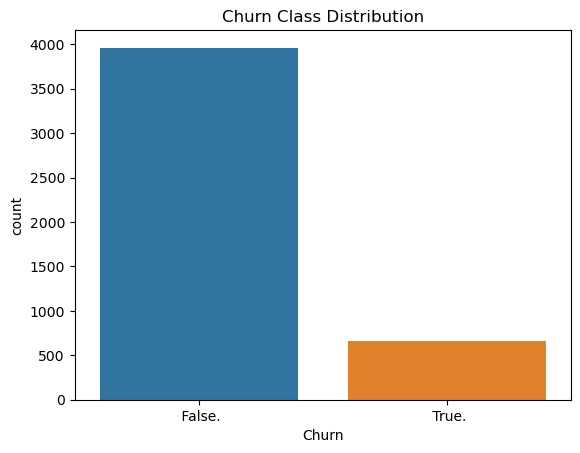

In [8]:
#Plot target imbalance 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Class Distribution")
plt.show()

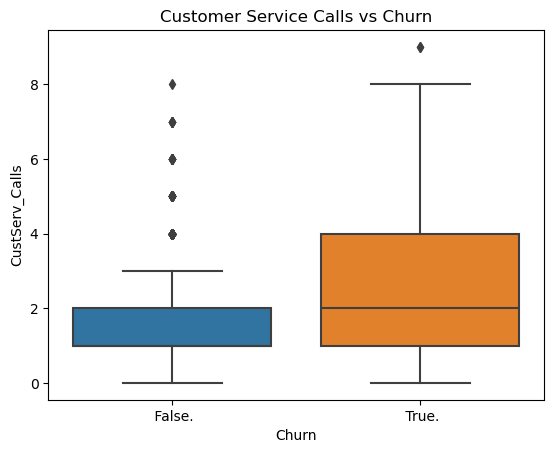

In [9]:
#Boxplot: Churn vs. CustServ_Calls
sns.boxplot(x='Churn', y='CustServ_Calls', data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()

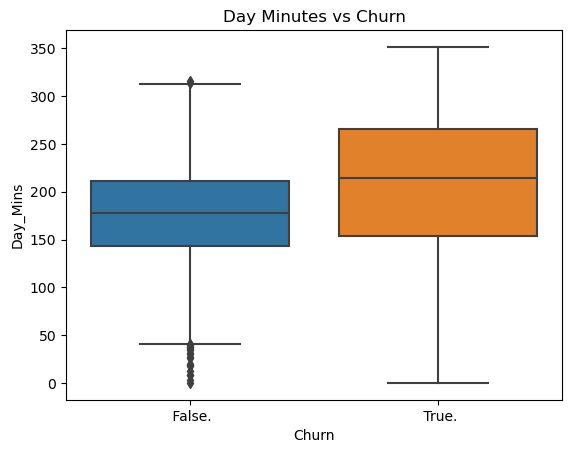

In [10]:
#Boxplot: Churn vs. Day_Mins
sns.boxplot(x='Churn', y='Day_Mins', data=df)
plt.title("Day Minutes vs Churn")
plt.show()

In [11]:
#DATA PREPROCESSING
df['Churn'] = df['Churn'].str.strip().map({'False.': 0, 'True.': 1})
#str.strip() removes extra spaces/dots

#map({'False': 0, 'True': 1}) replaces:
#False' with 0 (not churned)
#True' with 1 (churned)

In [12]:
#Binary Encoding for Yes/No columns
df['International_Plan'] = df['International_Plan'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['VMail_Plan'] = df['VMail_Plan'].str.strip().str.lower().map({'yes': 1, 'no': 0})

In [13]:
#One-Hot Encoding for Area Code
df = pd.get_dummies(df, columns=['Area_Code'], drop_first=True)

In [14]:
df.drop(['State', 'Phone'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Account_Length        4616 non-null   int64  
 1   International_Plan    4616 non-null   int64  
 2   VMail_Plan            4616 non-null   int64  
 3   VMail_Message         4616 non-null   int64  
 4   Day_Mins              4616 non-null   float64
 5   Day_Calls             4616 non-null   int64  
 6   Day_Charge            4616 non-null   float64
 7   Eve_Mins              4616 non-null   float64
 8   Eve_Calls             4616 non-null   int64  
 9   Eve_Charge            4616 non-null   float64
 10  Night_Mins            4616 non-null   float64
 11  Night_Calls           4616 non-null   int64  
 12  Night_Charge          4616 non-null   float64
 13  International_Mins    4616 non-null   float64
 14  International_Calls   4616 non-null   int64  
 15  International_Charge 

In [16]:
#train_test_split 
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
#SMOTE - HANDLE CLASS IMBALANCE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [18]:
#Linear Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000)

In [19]:
#Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [20]:
#Evaluation
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

[[586 207]
 [ 45  86]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       793
           1       0.29      0.66      0.41       131

    accuracy                           0.73       924
   macro avg       0.61      0.70      0.61       924
weighted avg       0.84      0.73      0.76       924

ROC AUC Score: 0.7548492053560255


In [21]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # Regularization strength (lower = stronger)
    'penalty': ['l1', 'l2'],                 # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear'],                # Required for L1 support
    'class_weight': ['balanced']            # Keep imbalance handling
}
lr = LogisticRegression(max_iter=1000)
grid = GridSearchCV(estimator=lr,param_grid=param_grid,scoring='f1',cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.7520545669421145


In [22]:
#Evaluation after tuning
best_model = grid.best_estimator_
# Predict on X_test
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

[[580 213]
 [ 43  88]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       793
           1       0.29      0.67      0.41       131

    accuracy                           0.72       924
   macro avg       0.61      0.70      0.61       924
weighted avg       0.84      0.72      0.76       924

ROC AUC Score: 0.7556000500563134


In [23]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    class_weight='balanced',   # handle imbalance
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)

In [24]:
#Train on Smote data 
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [25]:
#predict
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [26]:
#Evaluate
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

[[768  25]
 [ 29 102]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       793
           1       0.80      0.78      0.79       131

    accuracy                           0.94       924
   macro avg       0.88      0.87      0.88       924
weighted avg       0.94      0.94      0.94       924

ROC AUC Score: 0.8946555259282077


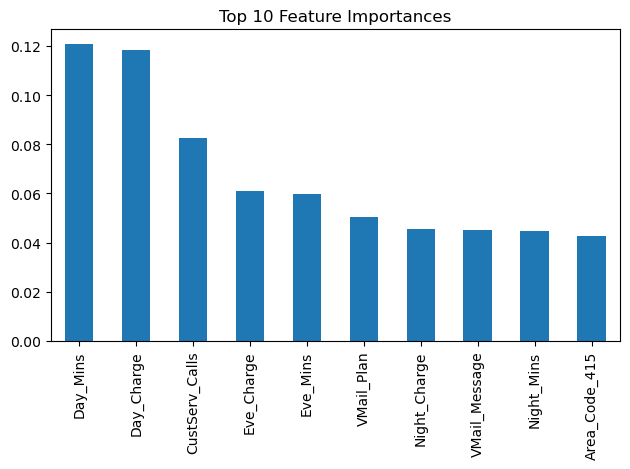

In [27]:
#Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

In [29]:
#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],'max_depth': [5, 10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],'bootstrap': [True, False],'class_weight': ['balanced']
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=30,scoring='f1',cv=5,verbose=1,n_jobs=-1,random_state=42)
rf_random.fit(X_train_balanced, y_train_balanced)
print("Best Parameters:", rf_random.best_params_)
print("Best F1 Score from CV:", rf_random.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Best F1 Score from CV: 0.9356851656979908


In [30]:
#Evaluation after tuning
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

[[771  22]
 [ 33  98]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       793
           1       0.82      0.75      0.78       131

    accuracy                           0.94       924
   macro avg       0.89      0.86      0.87       924
weighted avg       0.94      0.94      0.94       924

ROC AUC Score: 0.8981161498994061


In [31]:
#XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic',eval_metric='logloss',use_label_encoder=False,random_state=42,n_jobs=-1,
    scale_pos_weight=1,   # We already handled imbalance with SMOTE
)
xgb.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [32]:
#Predict
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [33]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

[[760  33]
 [ 25 106]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       793
           1       0.76      0.81      0.79       131

    accuracy                           0.94       924
   macro avg       0.87      0.88      0.87       924
weighted avg       0.94      0.94      0.94       924

ROC AUC Score: 0.9137683740361753


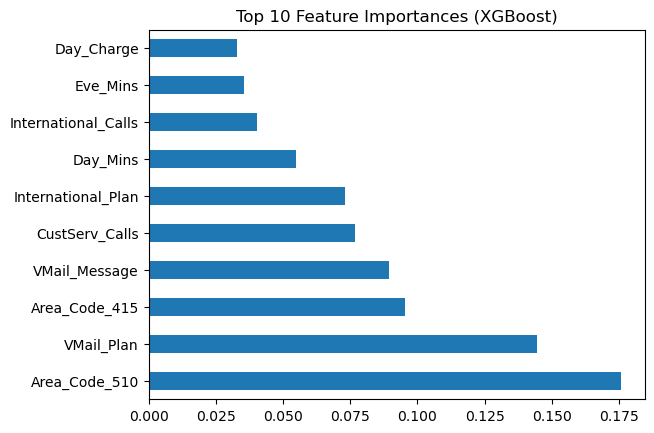

In [34]:
#Feature importance

pd.Series(xgb.feature_importances_, index=X.columns)\
    .sort_values(ascending=False)\
    .head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

In [ ]:
#Project Objective:
#The objective of this project is to identify customers who are likely to churn based on their usage patterns and service interactions, 
#understand the key drivers of churn, and provide actionable insights to help the business reduce customer loss.

In [38]:
a="""Summary of Work:
A customer churn prediction model was built using historical telecom data containing usage metrics, service plans, and customer interactions.
Data was cleaned, encoded, and balanced using SMOTE to address class imbalance.
Multiple models were tested — Logistic Regression, Random Forest, and XGBoost.
The best-performing model was XGBoost, achieving:
Recall (churners): 81%
Precision (churners): 76%
ROC AUC: 0.91
A churn risk score was generated for each customer using .predict_proba()."""
print(a)

Summary of Work:
A customer churn prediction model was built using historical telecom data containing usage metrics, service plans, and customer interactions.
Data was cleaned, encoded, and balanced using SMOTE to address class imbalance.
Multiple models were tested — Logistic Regression, Random Forest, and XGBoost.
The best-performing model was XGBoost, achieving:
Recall (churners): 81%
Precision (churners): 76%
ROC AUC: 0.91
A churn risk score was generated for each customer using .predict_proba().


In [41]:
b= """Key Findings:
High daytime usage and charges, frequent customer service calls, and low voicemail plan usage were found to be the top predictors of churn.
Customers with these characteristics are significantly more likely to leave the service."""
print(b)

Key Findings:
High daytime usage and charges, frequent customer service calls, and low voicemail plan usage were found to be the top predictors of churn.
Customers with these characteristics are significantly more likely to leave the service.


In [42]:
c= """Business Recommendation:
Use the churn risk score to identify the top 20% high-risk customers for retention campaigns.
Proactively support users with frequent service complaints and high bills.
Offer personalized billing plans and customer engagement strategies to reduce churn."""
print(c)

Business Recommendation:
Use the churn risk score to identify the top 20% high-risk customers for retention campaigns.
Proactively support users with frequent service complaints and high bills.
Offer personalized billing plans and customer engagement strategies to reduce churn.
